In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from IPython.display import Image
import scipy as sp
import scipy.stats
from scipy.stats import geom
from scipy.special import comb

**======================================================================================================================**

### <u><font color=blue> 1. 이항분포</font></u>

#### 정의 : 연속된 n번의 독립시행에서 각 시행이 확률 p를 가질 떄의 이산확률분포

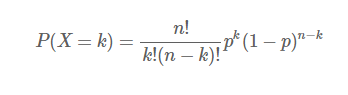

In [2]:
Image("binomial_formula.PNG")

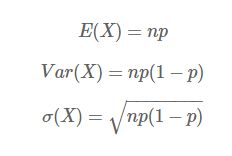

In [3]:
Image("binomial_mean_str.PNG")

#### ex) 15명의 환자에게 약을 투여해서 치료될 확률이 0.3

##### (1) 함수로 정의

In [4]:
def bin_dist(k, n, p):
    nck = factorial(n) / (factorial(k) * factorial(n - k))
    pd = nck * p**k * (1-p)**(n-k)
    return pd

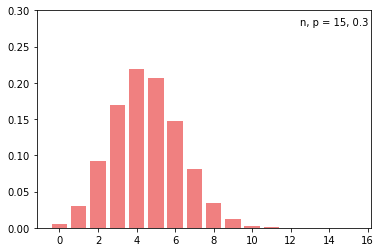

In [5]:
x = np.arange(16)
pd1 = np.array([bin_dist(k, 15, 0.3) for k in range(16)])
plt.ylim(0, 0.3)
plt.text(12.5, 0.28, 'n, p = 15, 0.3')
plt.bar(x, pd1, color='lightcoral')
plt.show()

##### (2) scipy

In [6]:
N = 15
mu = 0.3
rv = sp.stats.binom(N, mu)

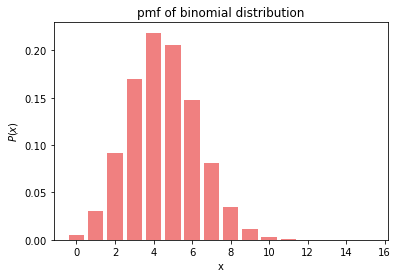

In [7]:
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align="center", color='lightcoral')
plt.xlabel("x")
plt.ylabel("$P(x)$")
plt.title("pmf of binomial distribution")
plt.show()

**======================================================================================================================**

### <u><font color=blue> 2. 베르누이분포</font></u>

#### - 이항분포에서 n=1일 때,

In [8]:
theta = 0.3
rv = sp.stats.bernoulli(theta)
rv

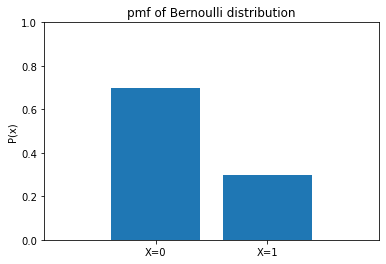

In [9]:
xx = [0, 1]
plt.bar(xx, rv.pmf(xx), align="center")
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["X=0", "X=1"])
plt.ylabel("P(x)")
plt.title("pmf of Bernoulli distribution")
plt.show()

**======================================================================================================================**

### <u><font color=blue> 3. 기하분포</font></u>

#### - 베르누이 시행에서 처음 성공까지 시도한 횟수 X의 분포
#### - 베르누이 시행에서 처음 성공까지 실패한 횟수 Y=X-1의 분포

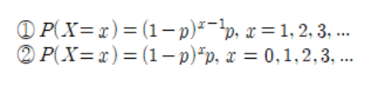

In [10]:
Image("geometric_formula.PNG")

In [11]:
rv = geom(p=0.05) #성공확률 0.3 대입 
rv.pmf(15) #총 시도횟수 6번 #결과는

0.02438374895577648

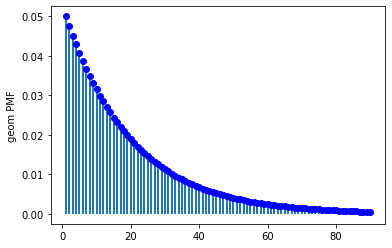

In [12]:
rv = geom(0.05) #p=0.05, shift = 0
x = np.arange(1, 90+1) #총 시행횟수 1~90까지
pmf_geom = rv.pmf(x)
fig = plt.figure() 
ax = fig.add_subplot(111)
ax.plot(x, pmf_geom, 'bo')
ax.vlines(x, 0, pmf_geom, lw =2)
ax.set_ylabel('geom PMF')
plt.show()

**======================================================================================================================**

### <u><font color=blue> 4. 음이항분포</font></u>

#### - 기하분포에서 성공횟수가 n번

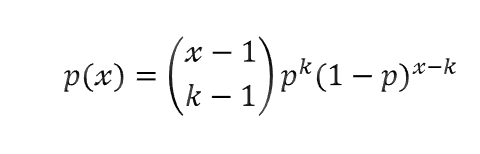

In [13]:
Image("Negative Binomial_formula.PNG")

In [14]:
x = np.arange(90)
n = 2
p = .05
y = comb(x + n - 1, n - 1) * p ** n * (1 - p) ** x
np.round(y, 3)

array([0.003, 0.005, 0.007, 0.009, 0.01 , 0.012, 0.013, 0.014, 0.015,
       0.016, 0.016, 0.017, 0.018, 0.018, 0.018, 0.019, 0.019, 0.019,
       0.019, 0.019, 0.019, 0.019, 0.019, 0.018, 0.018, 0.018, 0.018,
       0.018, 0.017, 0.017, 0.017, 0.016, 0.016, 0.016, 0.015, 0.015,
       0.015, 0.014, 0.014, 0.014, 0.013, 0.013, 0.012, 0.012, 0.012,
       0.011, 0.011, 0.011, 0.01 , 0.01 , 0.01 , 0.01 , 0.009, 0.009,
       0.009, 0.008, 0.008, 0.008, 0.008, 0.007, 0.007, 0.007, 0.007,
       0.006, 0.006, 0.006, 0.006, 0.005, 0.005, 0.005, 0.005, 0.005,
       0.005, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.003, 0.003,
       0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.002, 0.002])

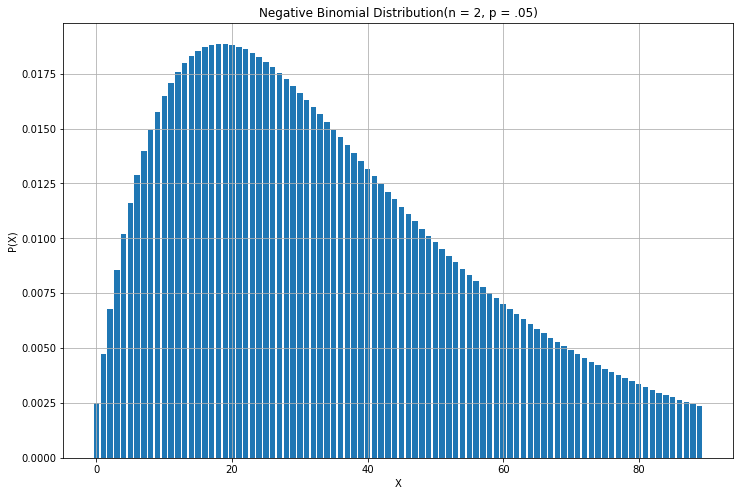

In [15]:
plt.figure(figsize=(12, 8))
plt.bar(x, y)
plt.xlabel('X')
plt.ylabel('P(X)')
plt.title('Negative Binomial Distribution(n = 2, p = .05)')
plt.grid()
plt.show()

**======================================================================================================================**